In [1]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

In [2]:

plt.style.use(['fivethirtyeight','presentation-dark.mplstyle'])
plt.rcParams['figure.dpi']=300
from cycler import cycler
# plt.rcParams['axes.prop_cycle']=cycler('color',['#08F7FE','#FE53BB','#F5D300','#00ff41'])

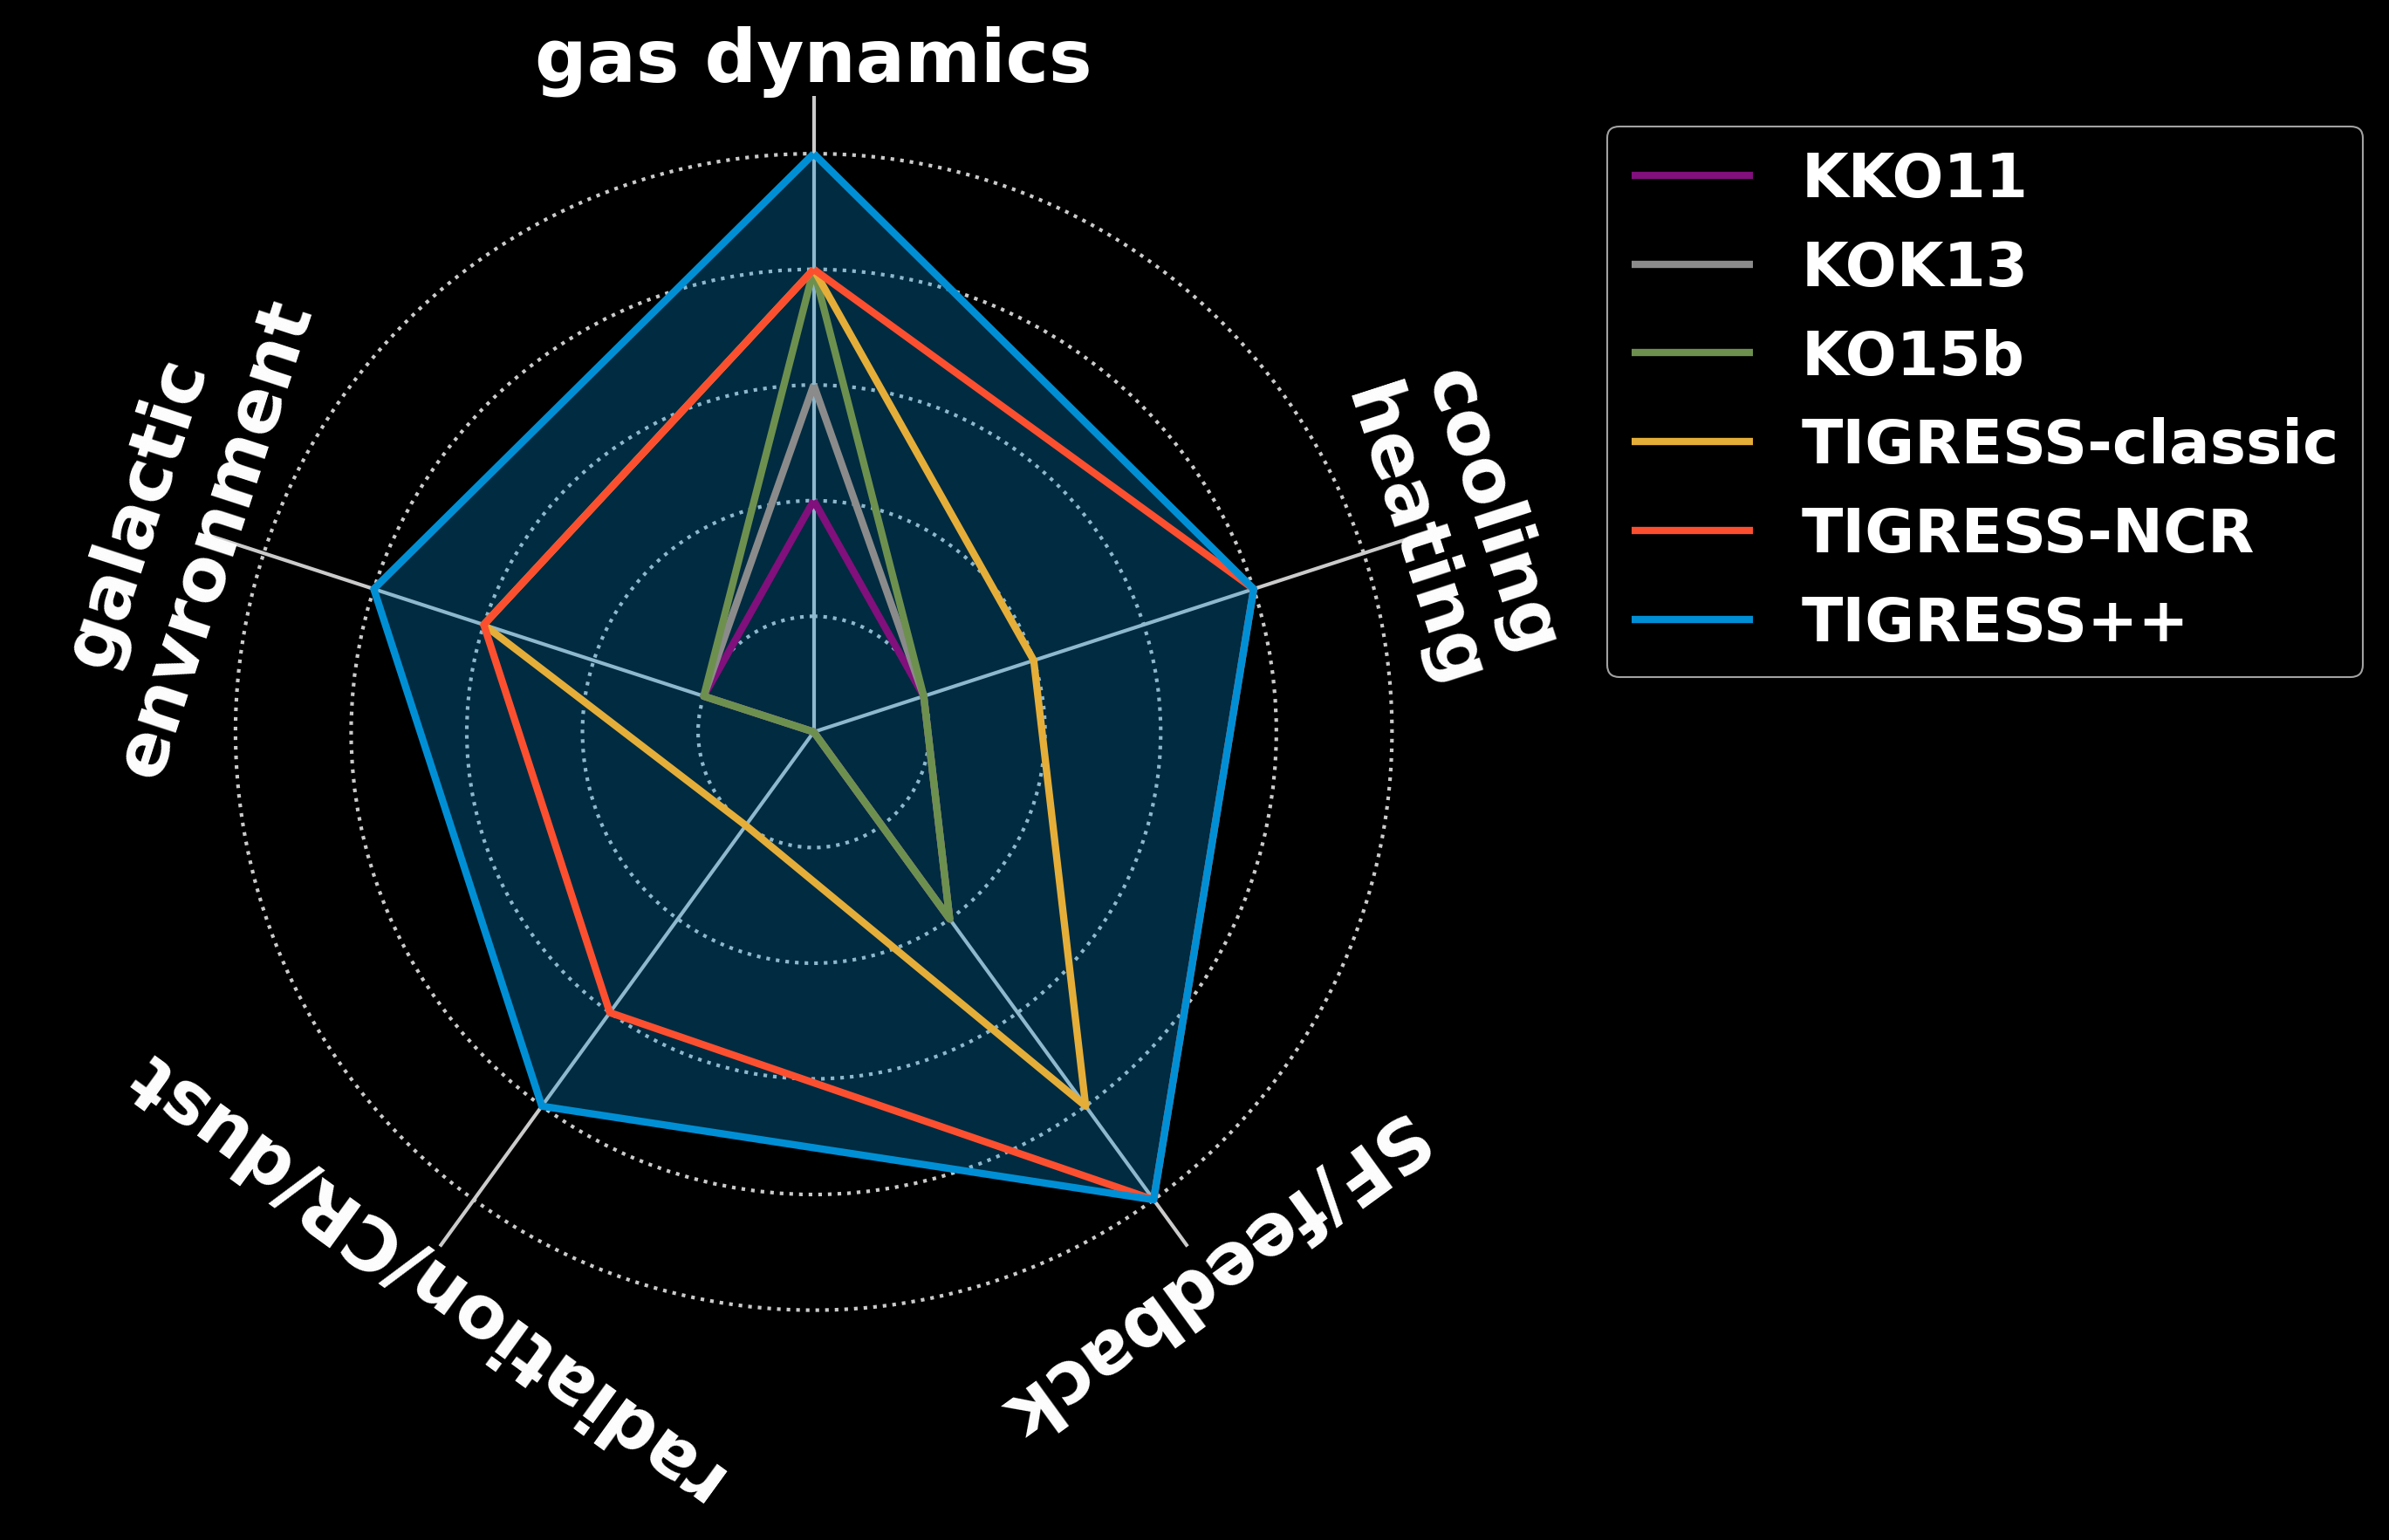

In [10]:
fig = plt.figure()
# Set data
df = pd.DataFrame({
'group': ['KKO11', 'KOK13', 'KO15b','TIGRESS-classic', 'TIGRESS-NCR', 'TIGRESS++'],
'gas dynamics': [2, 3, 4, 4, 4, 5],
'cooling\nheating': [1, 1, 1, 2, 4, 4],
'SF/feedback': [2, 2, 2, 4, 5, 5],
'radiation/CR/dust': [0, 0, 0, 1, 3, 4],
'galactic\nenvronment': [1, 1, 1, 3, 3, 4],
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

angles_deg = [n / float(N) * 360 for n in range(N)]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Ind1
lines=[]
polygons=[]
for idx in [0,1,2,3,4,5]:
    values=df.loc[idx].drop('group').values.flatten().tolist()
    values += values[:1]
    l=ax.plot(angles, values, linewidth=2, linestyle='solid', label=df.group[idx], 
            color='C{}'.format(5-idx))
    poly=ax.fill(angles, values, 'C{}'.format(5-idx), alpha=0.3)
    lines.append(l)
    polygons.append(poly)
# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw r grids
ax.set_rmax(5.5)
gridlines,gridlabels=ax.set_rgrids([1,2,3,4,5],labels=[""]*5)
ax.spines['polar'].set_visible(False)
ax.spines['inner'].set_visible(False)
ax.spines['start'].set_visible(False)
ax.spines['end'].set_visible(False)
plt.setp(gridlines,'linestyle',':')
for ang, cat in zip(angles[:-1],categories):
    plt.annotate(cat,(ang,5.8),ha='center',va='center',
                 annotation_clip=False,
                 rotation=(-ang)*180/pi)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], [""]*N)

plt.setp(lines+polygons,'visible',False)
plt.savefig('radar_plane.png',bbox_inches='tight')

l_prev=[]
p_prev=[]
for i,l,poly in zip(range(len(lines)),lines,polygons):
    plt.setp(l_prev,'alpha',0.5)
    plt.setp(p_prev,'alpha',0.0)
    l_prev.append(l)
    p_prev.append(poly)
    plt.setp([l,poly],'visible',True)
    plt.savefig('radar_{}.png'.format(i),bbox_inches='tight')

plt.setp(l_prev,'alpha',1)
plt.savefig('radar_all.png',bbox_inches='tight')